In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import importlib
import crypto_object

%matplotlib inline

In [26]:
crypto_object = importlib.reload(crypto_object)

In [27]:
btc = crypto_object.Coin('BTC', 'cryptocurrencypricehistory/bitcoin_price.csv')

In [28]:
btc.full_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Pct Returns
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",0.015893
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",0.063828
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",-0.050474
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",0.085871
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",0.006640


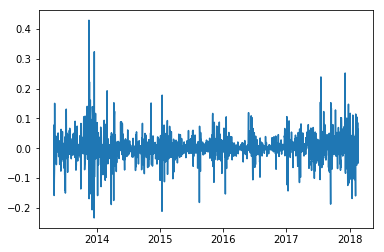

In [33]:
plt.plot(btc.full_data.loc[:,'Date'], btc.full_data.loc[:,'Pct Returns'])

In [35]:
(btc.full_data.loc[2,'Date'] - btc.full_data.loc[3,'Date']).days

1

In [36]:
import datetime

In [ ]:
btc.full_data['Date'][btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")]

In [44]:
np.argwhere(btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d"))[0][0]

1

In [40]:
datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")

datetime.datetime(2018, 2, 19, 0, 0)

In [45]:
np.random.choice(btc.full_data['Pct Returns'])

0.0095367087599090138

In [46]:
import option_pricing as op

In [171]:
op = importlib.reload(op)

In [158]:
d1 = datetime.datetime.strptime('2016-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
out = op.random_paths(btc, d1, d2, lookback=60, N=50)

In [159]:
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
btc.full_data['Close'][(idx2):idx1].sort_index(ascending=False)

732     420.79
731     437.16
730     438.80
729     437.75
728     420.74
727     424.95
726     424.54
725     432.15
724     432.52
723     433.50
722     437.70
721     435.12
720     423.99
719     421.65
718     410.94
717     400.57
716     407.71
715     414.32
714     413.97
713     414.86
712     417.13
711     421.69
710     411.62
709     414.06
708     416.44
707     416.83
706     417.01
705     420.62
704     409.55
703     410.44
        ...   
395     921.79
394     924.67
393     921.01
392     892.69
391     901.54
390     917.59
389     919.75
388     921.59
387     919.50
386     920.38
385     970.40
384     989.02
383    1011.80
382    1029.91
381    1042.90
380    1027.34
379    1038.15
378    1061.35
377    1063.07
376     994.38
375     988.67
374    1004.45
373     999.18
372     990.64
371    1004.55
370    1007.48
369    1027.44
368    1046.21
367    1054.42
366    1047.87
Name: Close, Length: 367, dtype: float64

In [160]:
idx2

366

In [161]:
def plot_random_paths(rp, true_path, coin):
    
    f, ax = plt.subplots(1,1, figsize=(12,8))
    
    dates = rp.index
    
    rp = rp.sort_index(axis=0 ,ascending=False).values
    true_path = true_path.sort_index(ascending=False).values
    
    N = rp.shape[1]
    
    for i in np.arange(N):
        ax.plot(dates, rp[:, i], color='blue', alpha=.2)
        
    ax.plot(dates, true_path, color='red')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('{} Price'.format(coin.name))
    ax.set_title(coin.name)

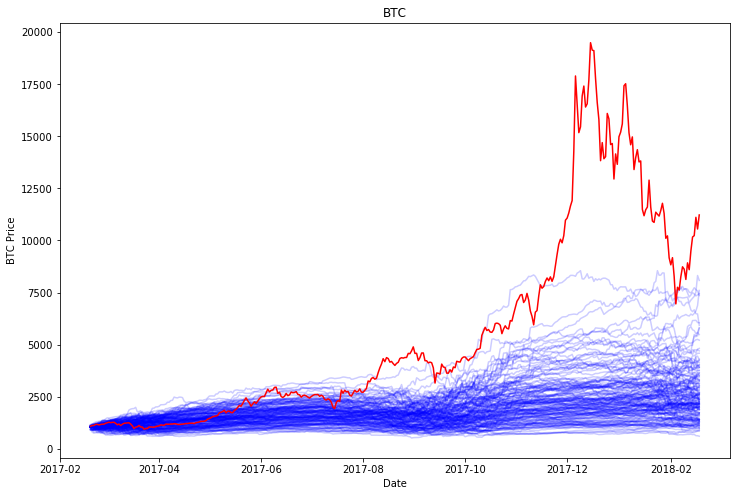

In [167]:
d1 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
out = op.random_paths(btc, d1, d2, lookback=60, N=150)
plot_random_paths(out, btc.full_data['Close'][idx2:idx1].reset_index()['Close'], btc)

In [170]:
out.iloc[-1, :]

0      1034.673404
1      1062.583591
2      1072.802856
3      1091.570502
4      1040.786532
5      1062.584287
6      1072.802856
7      1067.976492
8      1032.235848
9      1053.499154
10     1050.595308
11     1034.673404
12     1042.372190
13     1041.852846
14     1058.896023
15     1045.493620
16     1058.258432
17     1038.244592
18     1071.287217
19     1045.493620
20     1043.161362
21     1066.625610
22     1068.630199
23     1058.258432
24     1071.287217
25     1049.568155
26     1061.086525
27     1043.722354
28     1061.086525
29     1067.976492
          ...     
120    1104.818714
121    1050.336678
122    1159.188118
123    1045.271585
124    1050.595308
125    1067.013230
126    1072.452168
127     919.600686
128    1067.013230
129    1023.264202
130    1051.143919
131    1072.005486
132     897.884024
133    1085.479545
134    1091.570502
135    1058.669785
136    1021.547662
137    1117.490437
138    1067.976492
139    1104.818714
140    1049.568155
141    1041.

In [175]:
op.empirical_method(btc, d1, d2, 0, 5000, 'call', lookback=30, N=500)

142.14925902025297